In [2]:
from gpt_lm import GPTWrapper, construct_model, SupervisedDataset
import transformers
import torch
import pandas as pd
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader, Sampler
import matplotlib.pyplot as plt

"Собираем" модель:

In [3]:
model, kwargs = construct_model()

In [4]:
kwargs

{'max_new_tokens': 100,
 'num_beams': 3,
 'early_stopping': True,
 'no_repeat_ngram_size': 2}

Подгружаем датасет для обучения:

In [5]:
sft_df = pd.read_parquet('datasets/argilla_df.parquet')

In [6]:
sft_df

,prompt,response-1,response-2,category,original_response,external_id
0,What is Depreciation,What is Depreciation – 10 Important Facts to K...,What is Depreciation on a Car?\nDepreciation i...,open_qa,Depreciation is the drop in value of an asset ...,518
1,What do you know about the city of Aberdeen in...,"Aberdeen, the city in which I've lived for the...","As an AI language model, I don't have personal...",open_qa,Aberdeen is a city located in the North East o...,351
2,Describe thunderstorm season in the United Sta...,Describe thunderstorm season in the United Sta...,Describe thunderstorm season in the United Sta...,information_extraction,Thunderstorm season in the United States and C...,10567
3,"When did Peloton IPO?\nOn September 26, 2019, ...",When did Peloton IPO?\nPeloton launched its in...,When did Peloton IPO?\nPeloton IPO'd on May 26...,closed_qa,Peloton became a public company via an initial...,12412
4,What is the best way to answer an interview qu...,The best way to answer an interview question m...,Some of the best ways to answer an interview q...,creative_writing,The first recommended step is to ask clarifyin...,2521
...,...,...,...,...,...,...
7396,How do i accept the change,How do i accept the change in my life\nAccepti...,I's a great opportunity to improve. The only t...,brainstorming,Embrace the change and see the difference,15010
7397,Extract the teams that the footballer Sócrates...,Extract the teams that the footballer Sócrates...,Extract the teams that the footballer Sócrates...,information_extraction,"Brazil, Botafogo-SP, Corinthians, Fiorentina",9970
7398,Without quoting directly from the text give me...,Without quoting directly from the text give me...,Without quoting directly from the text give me...,summarization,"Brendon Small is a stand-up comedian, Creator...",14205
7399,Is Killing is Sin ? Is it ture,Is Killing is Sin ? Is it ture?\nKilling can b...,Is Killing is Sin ? Is it ture?\nKilling is no...,brainstorming,Killing a human being should not be sin becaus...,11253


Обучаем модель на полученном датасете.
P.S. писал на мак оси, поэтому device = 'mps', cuda тут не поддерживается. Если сидите с винды или линукса пропишите device = 'cuda'

In [7]:
loss_values = GPTWrapper.train_n_save(model, sft_df, 3e-4, 1000) # Adam optimizer

Loss value: 3.1484062671661377, Iteration: 0
Loss value: 3.106400489807129, Iteration: 1
Loss value: 0.30628418922424316, Iteration: 2
Loss value: 0.8981361389160156, Iteration: 3
Loss value: 3.421678066253662, Iteration: 4
Loss value: 3.2866904735565186, Iteration: 5
Loss value: 1.490012526512146, Iteration: 6
Loss value: 2.175367832183838, Iteration: 7
Loss value: 3.0000526905059814, Iteration: 8
Loss value: 1.125977635383606, Iteration: 9
Loss value: 1.1495676040649414, Iteration: 10
Loss value: 3.564312696456909, Iteration: 11
Loss value: 0.5252553224563599, Iteration: 12
Loss value: 4.476998805999756, Iteration: 13
Loss value: 1.0105396509170532, Iteration: 14
Loss value: 2.086045980453491, Iteration: 15
Loss value: 1.5908969640731812, Iteration: 16
Loss value: 2.2885987758636475, Iteration: 17
Loss value: 2.7801425457000732, Iteration: 18
Loss value: 3.104731798171997, Iteration: 19
Loss value: 3.7411513328552246, Iteration: 20
Loss value: 2.497077465057373, Iteration: 21
Loss va

In [10]:
model.generate('Question: How to repair car? Answer: I ', **kwargs)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Question: How to repair car? Answer: I \xa0have a car that has been broken down and broken into pieces. I have repaired the car, but it has not been repaired yet.<|endoftext|>'

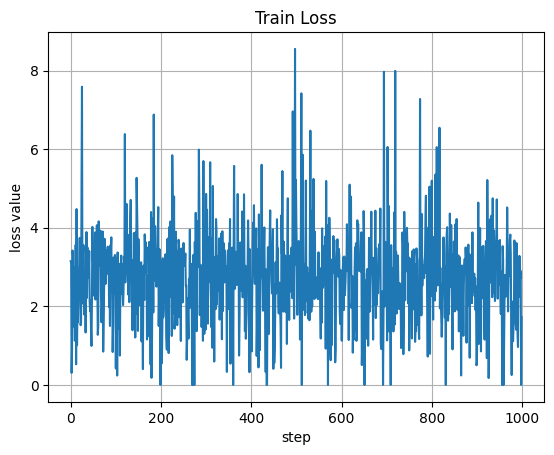

In [12]:
t = [i for i in range(len(loss_values))]
s = loss_values

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='step', ylabel='loss value',
       title='Train Loss')
ax.grid()

plt.show()